In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import seaborn as sns
import os
import statistics

### pre-processing of the tube station 15min aggregated counts

In [ ]:
tube_info = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\ByQhrEntryExit_2018.csv')

tube_frame = pd.melt(tube_info, id_vars = ['Station',' day', ' dir'], 
                     value_vars = tube_info.columns[15:], 
                     var_name='timestamp', value_name='count')

for i in range(len(tube_frame.timestamp)):
    tube_frame.timestamp[i] = tube_frame.timestamp[i][0:4]

tube_frame['hour'] = 0
for i in range(len(tube_frame.hour)):
    tube_frame.hour[i] = tube_frame.timestamp[i][0:2]
    
tube_frame.to_csv('D:\CASA\modules_2\Dissertation\publication\data\ByhrEntryExit2018.csv')

## Auto Plot-Making Function

In [60]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 

tube_frame = pd.read_csv('D:\CASA\modules_2\Dissertation\publication\data\ByhrEntryExit2018.csv')

In [63]:
plt.style.use('default')

In [111]:
def ComparasionPlot(loc, stat):
    
    fig,axs = plt.subplots(4,1, figsize=(8, 20))

    
    ff_case = ff.loc[(ff.location == loc) & (ff.timestamp >= '2018-09') & (ff.timestamp <= '2018-11-30')
                    ][['timestamp','footfall','year','month','day','hour','day_of_week']]
    ff_case.index = ff_case.timestamp
    
     ### location flow overview
#    ff_case['footfall'].plot(title = 'Footfall Counts per hour', fontsize = 14, linewidth = 2, ax = axs[0])
#    plt.xlabel('Datetime')
#    plt.ylabel('Footfall Counts')
#    plt.legend(loc = 'best')


    # location flow 
    ff_case = ff_case.resample('H').mean()
    ff_case['footfall'].replace(0, np.nan, inplace = True)
    ff_case['footfall'] = ff_case['footfall'].interpolate(method='linear')
    ff_case = ff_case.reset_index(level = ['timestamp'])
    ff_case.timestamp = pd.to_datetime(ff_case.timestamp, format = '%Y-%m-%d %H:%M:%S')

    temp = ff_case[['timestamp', 'footfall']]
    temp.index = temp.timestamp
    temp['hour'] = temp.timestamp.dt.hour
    temp['day_of_week'] = temp.timestamp.dt.dayofweek + 1
    temp
    ff_case = temp

    weekday = 1
    ff_case.loc[(ff_case.day_of_week >= 1) & (ff_case.day_of_week <= 4)].groupby('hour')['footfall'].mean().plot(
        title = 'Location ' + str(loc) + ' 5min Aggregated Counts by Hourly Mean',
        label = 'MTT', linewidth = 2, ax = axs[0])

    weekday = 5
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'FRI', linewidth = 2, ax = axs[0])

    weekday = 6
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SAT', linewidth = 2, ax = axs[0])

    weekday = 7
    ff_case.loc[(ff_case.day_of_week == weekday)].groupby('hour')['footfall'].mean().plot(
        label = 'SUN', linewidth = 2, ax = axs[0])

    plt.legend(loc = 'best')


    # nearest tube station flow(in)
    direct = 'IN'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Entry Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[1])

    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[1])

    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[1])

    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[1])


    # nearest tube station flow(out)
    direct = 'OUT'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Exit Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[2])

    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[2])

    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[2])

    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day) & 
                   (tube_frame[' dir'] == direct)].groupby('hour')['count'].mean().plot(
        label = day, linewidth = 2, ax = axs[2])




    # nearest tube station flow(both)
    direct = 'BOTH'

    day = 'MTT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(
        title = stat + ' Tube Station 15min Aggregated Entry & Exit Counts by Hourly Mean',
        label = day, linewidth = 2, ax = axs[3])

    day = 'FRI'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[3])

    day = 'SAT'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[3])

    day = 'SUN'
    tube_frame.loc[(tube_frame.Station == stat) & (tube_frame[' day'] == day)
                  ].groupby('hour')['count'].mean().plot(label = day, linewidth = 2, ax = axs[3])

    plt.legend(loc = 'best')

No handles with labels found to put in legend.


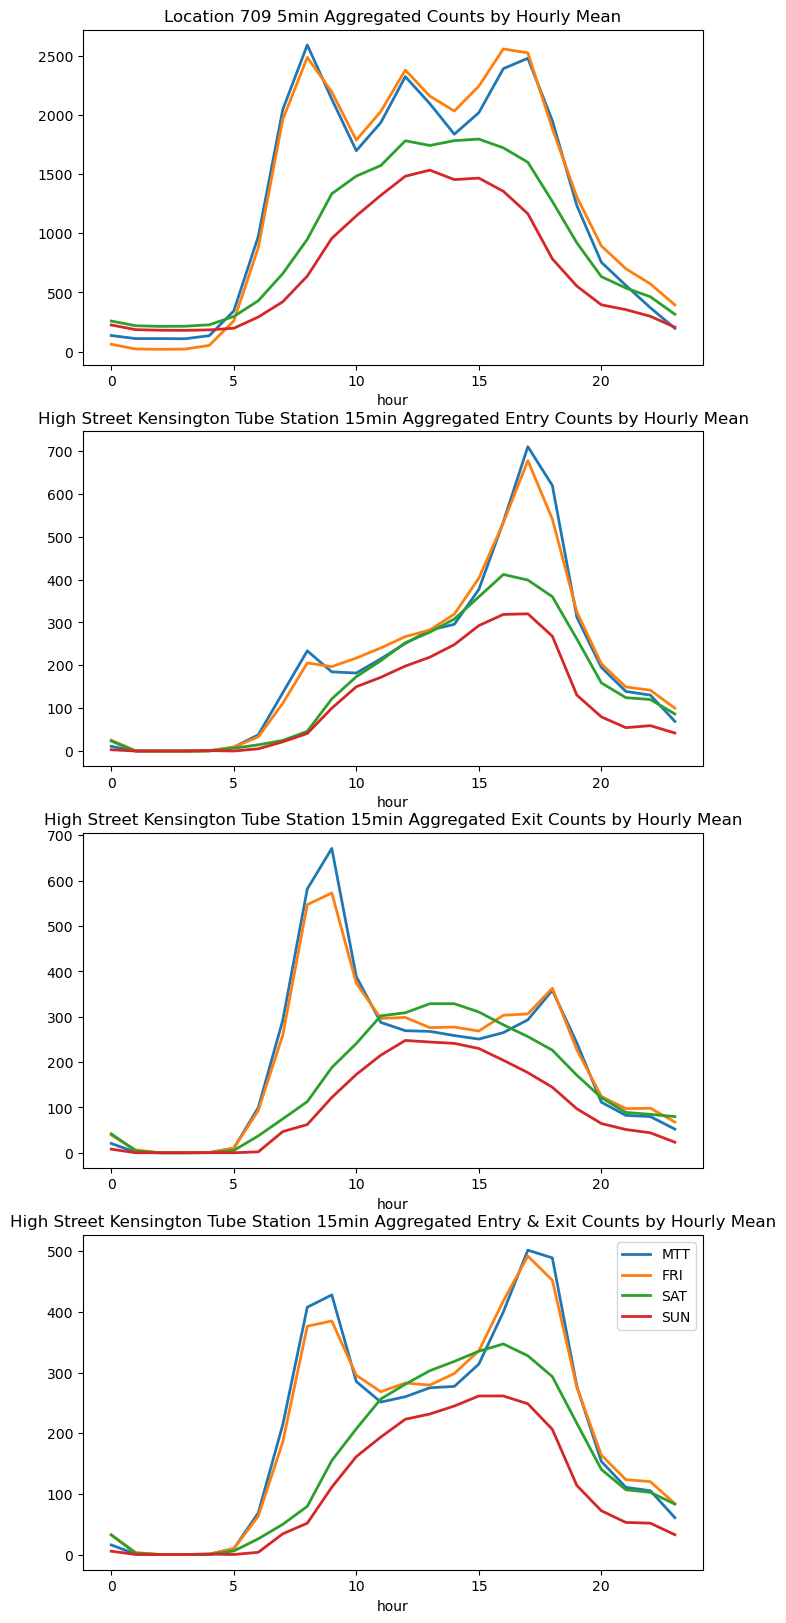

In [112]:
ComparasionPlot(709, 'High Street Kensington')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


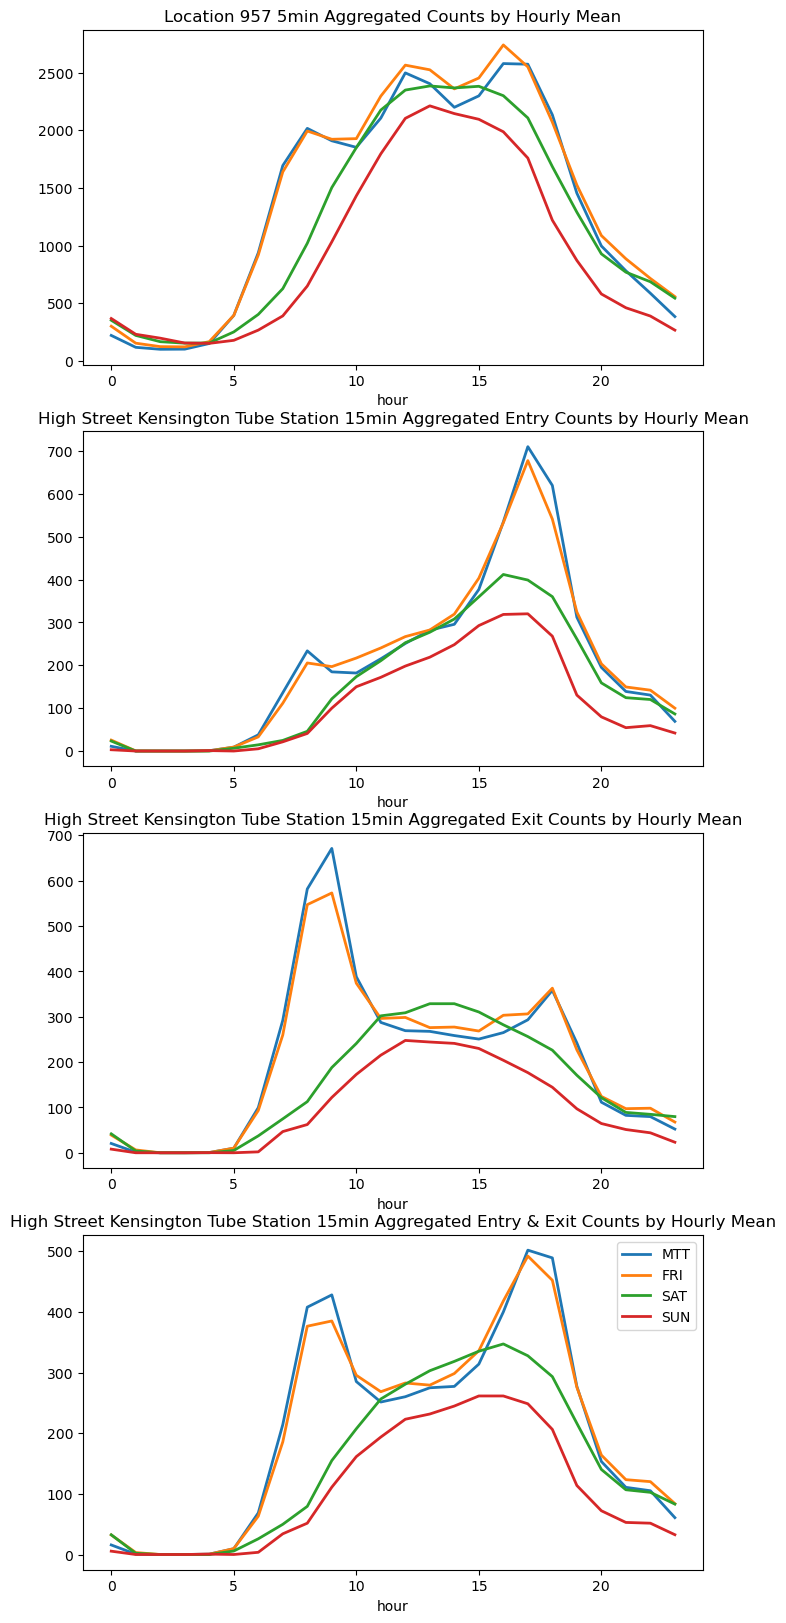

In [91]:
ComparasionPlot(957, 'High Street Kensington')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


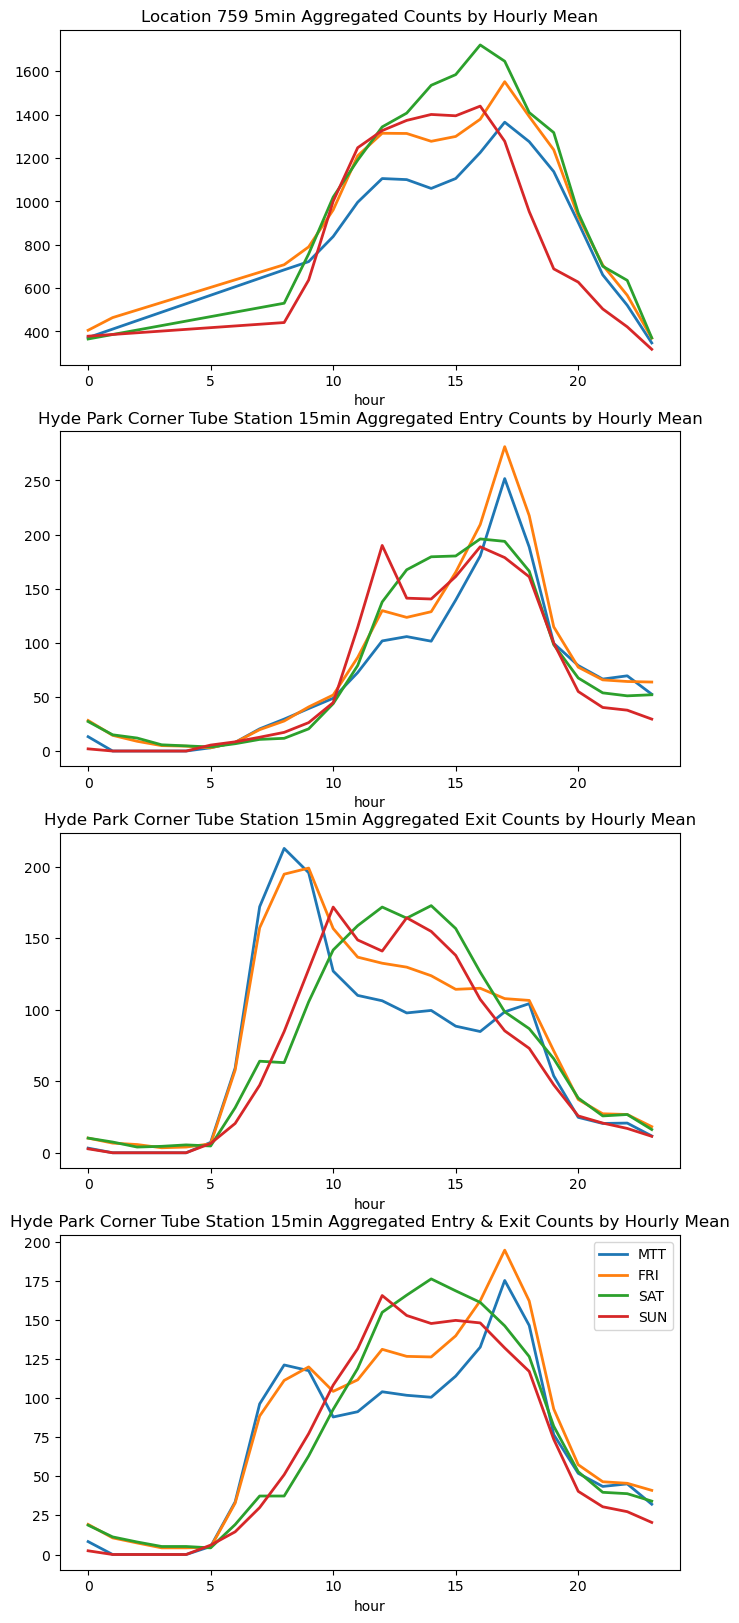

In [92]:
ComparasionPlot(759, 'Hyde Park Corner')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


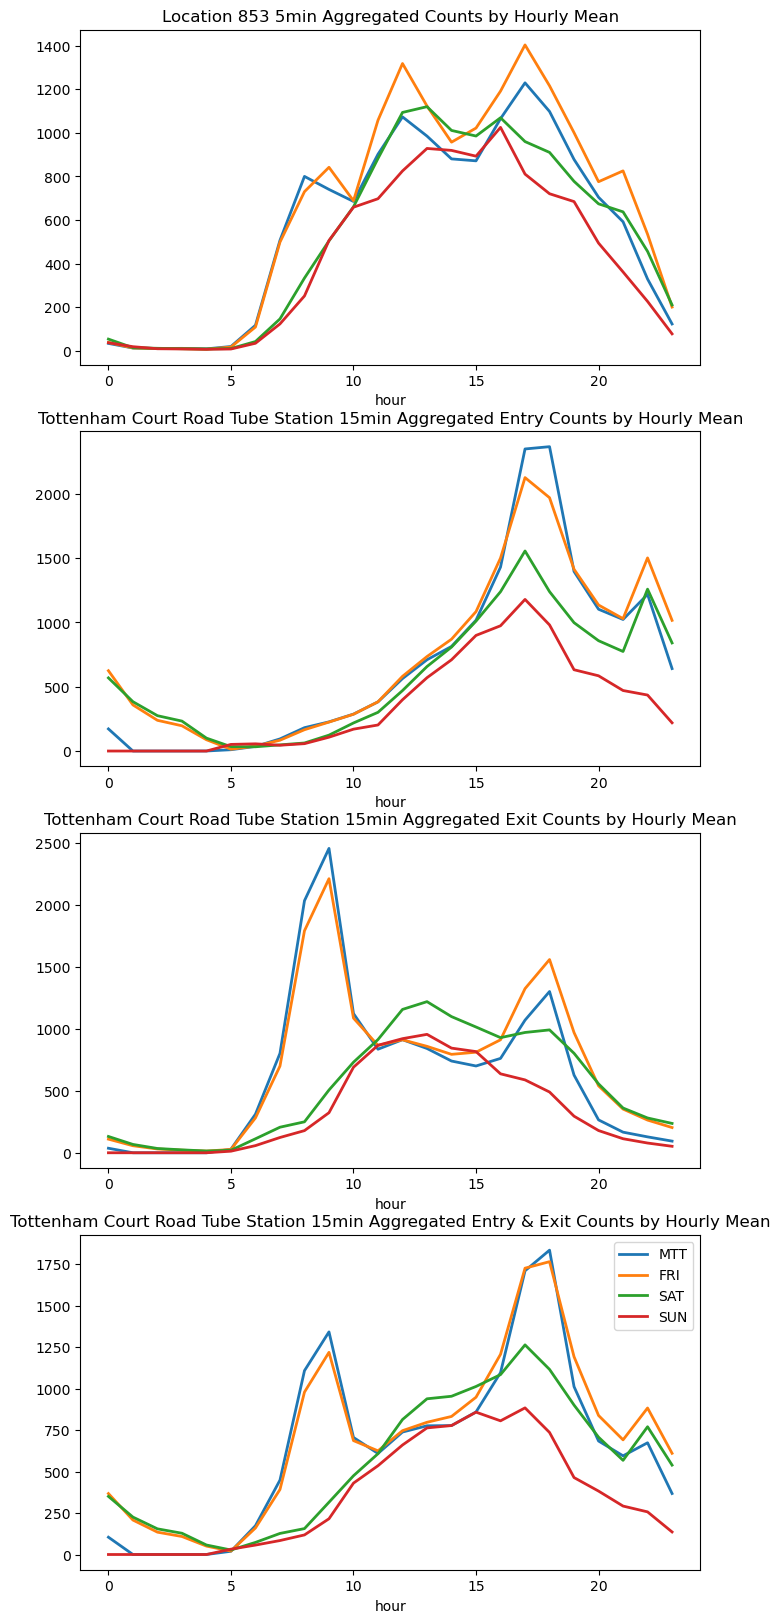

In [93]:
ComparasionPlot(853, 'Tottenham Court Road')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


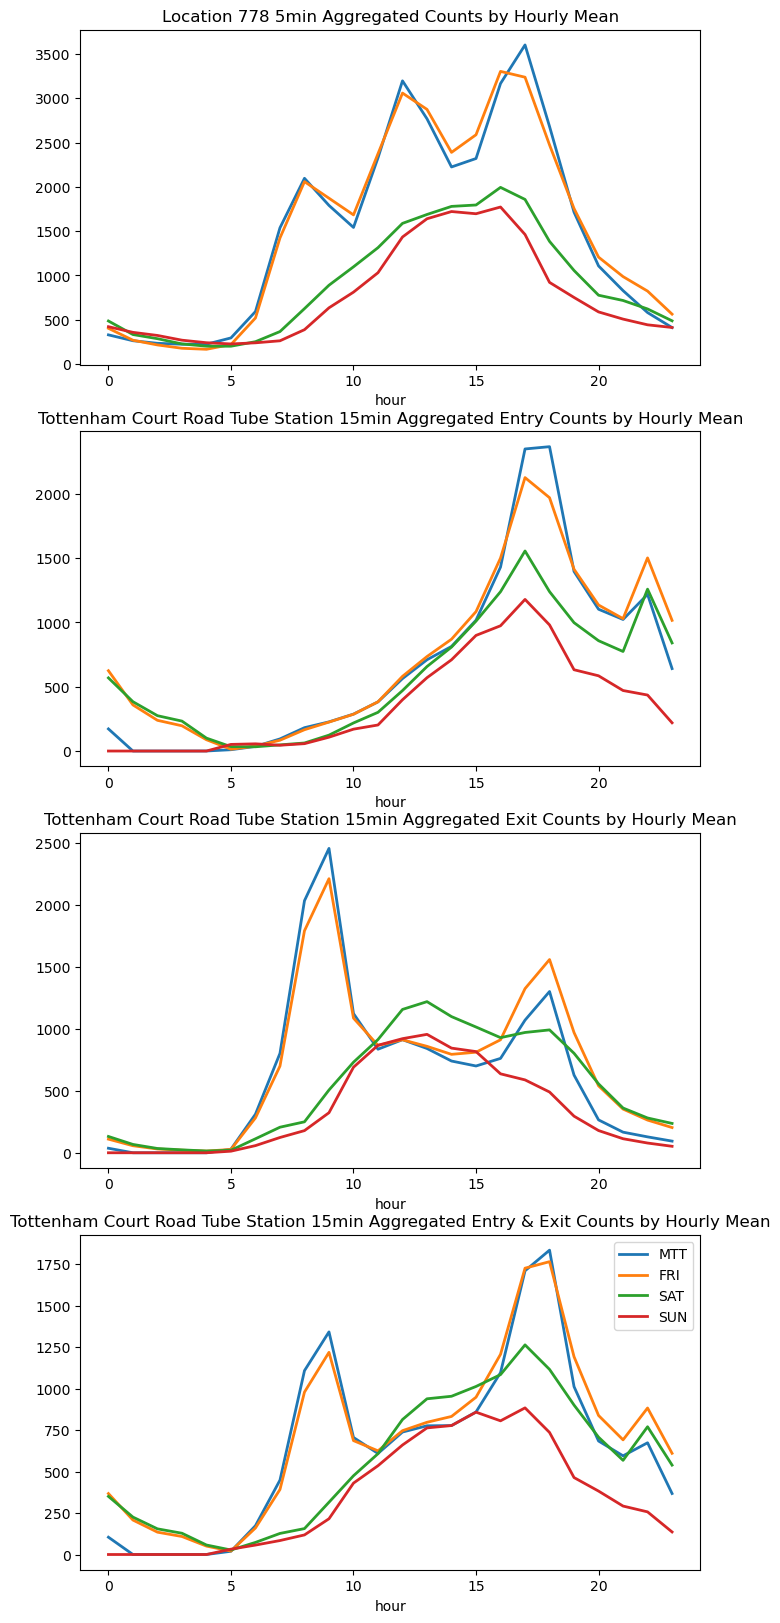

In [94]:
ComparasionPlot(778, 'Tottenham Court Road')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


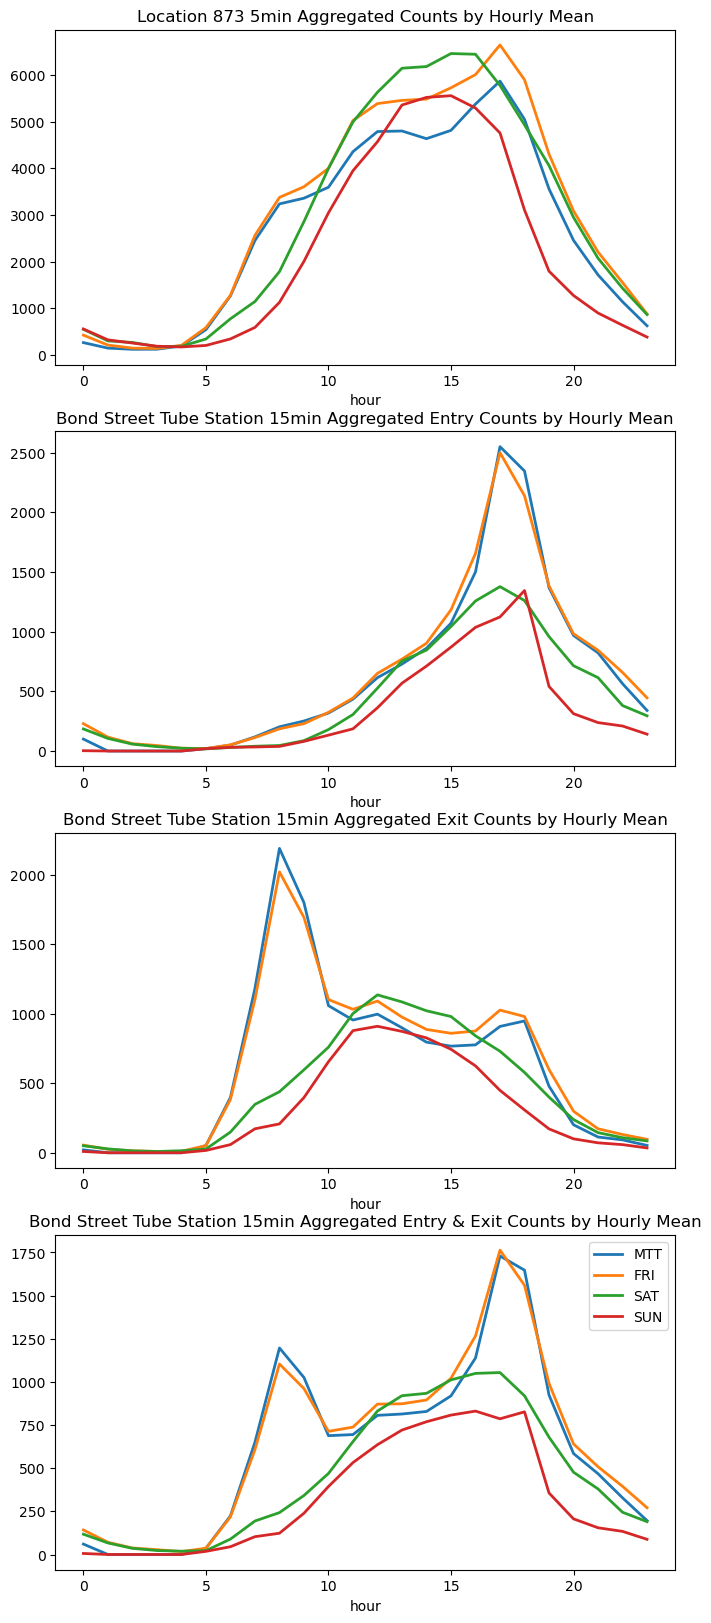

In [95]:
ComparasionPlot(873, 'Bond Street')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


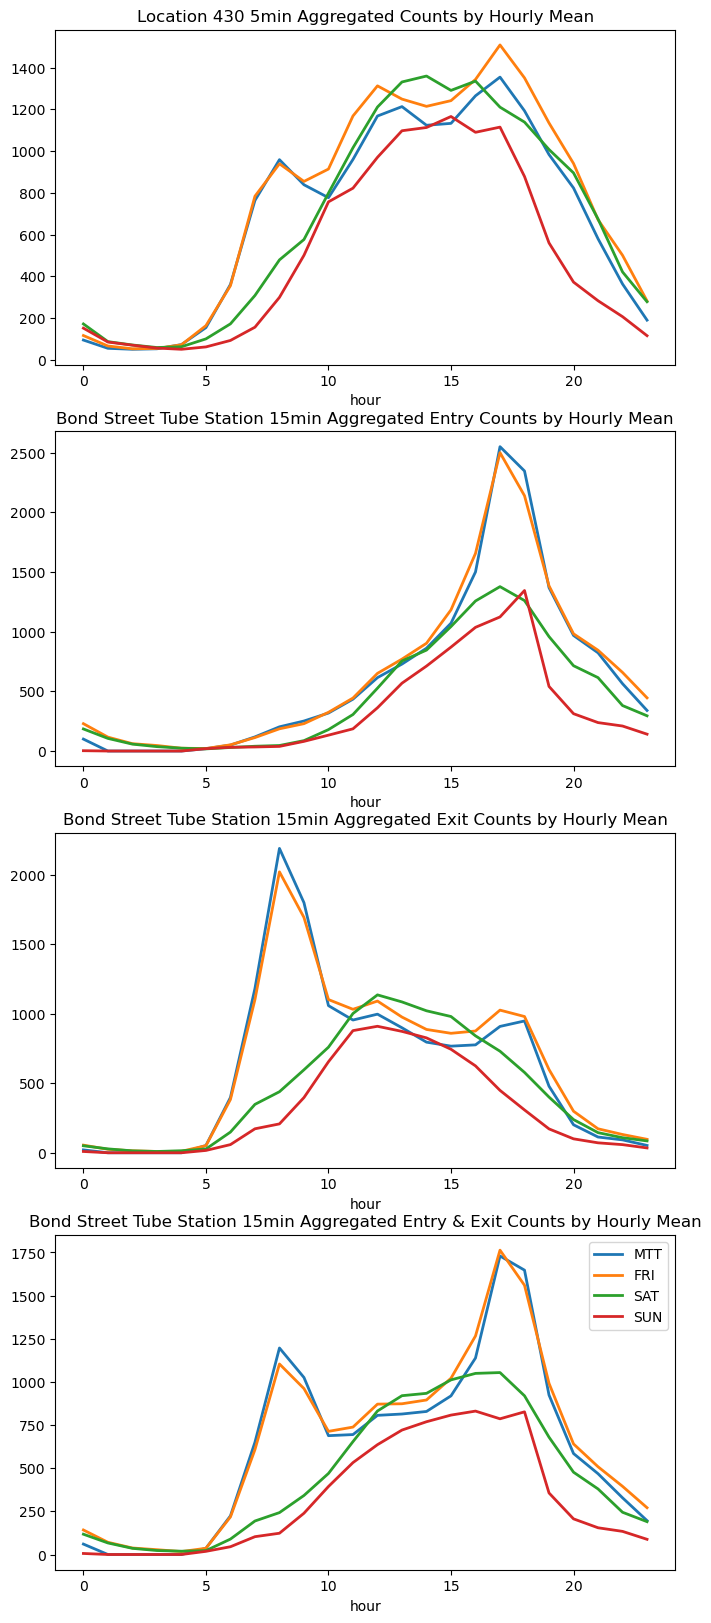

In [96]:
ComparasionPlot(430, 'Bond Street')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


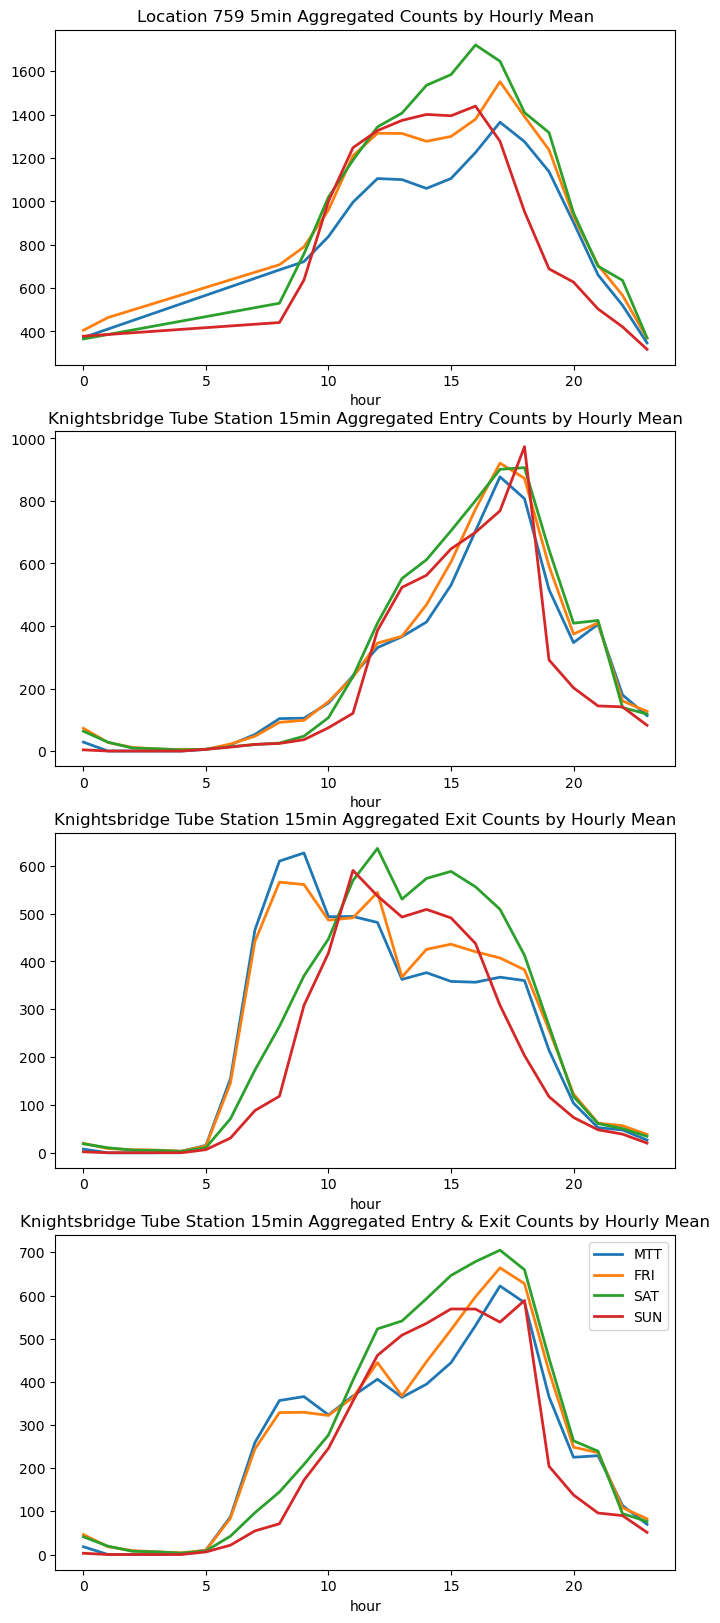

In [97]:
ComparasionPlot(759, 'Knightsbridge')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


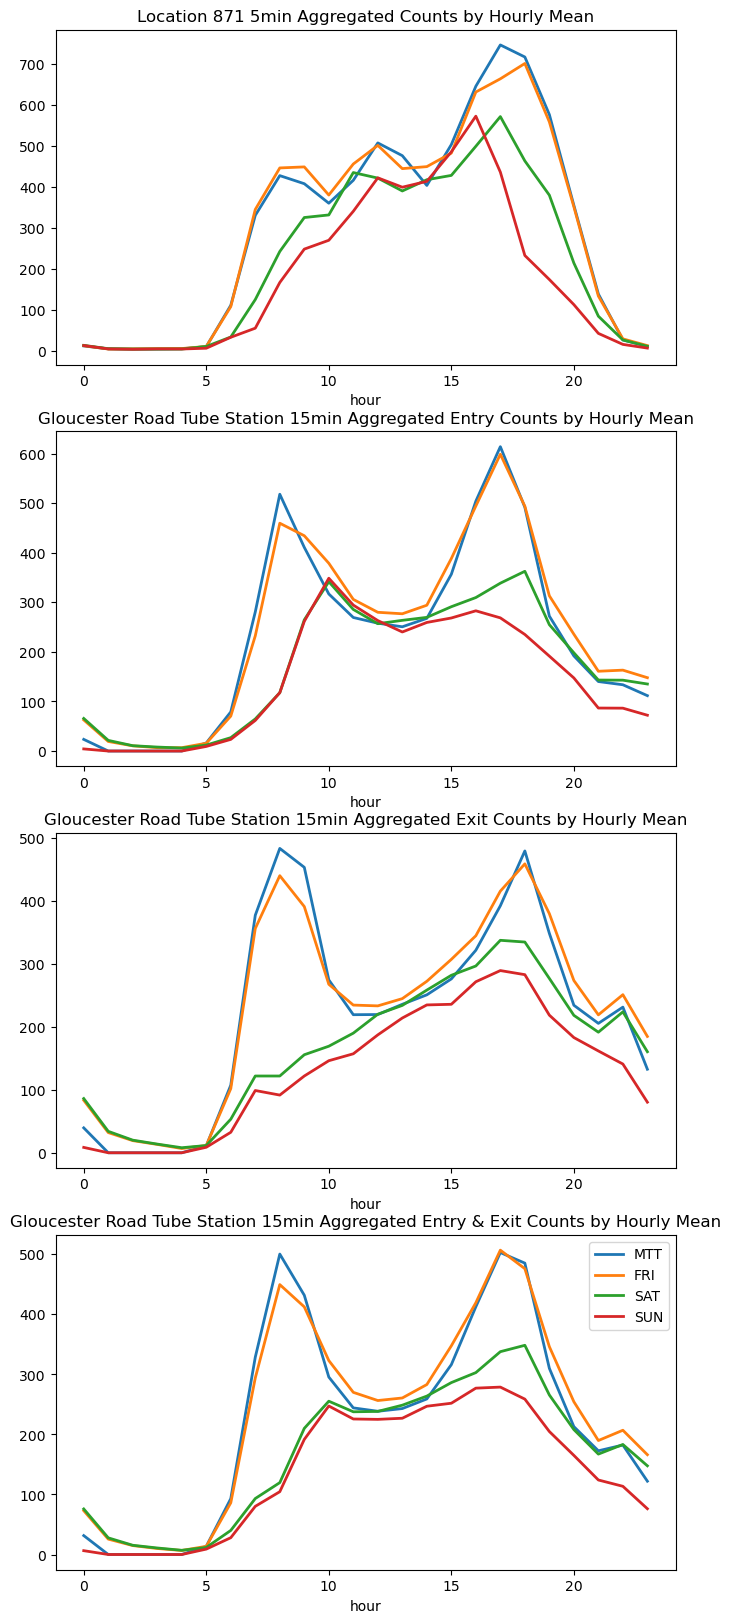

In [98]:
ComparasionPlot(871, 'Gloucester Road')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


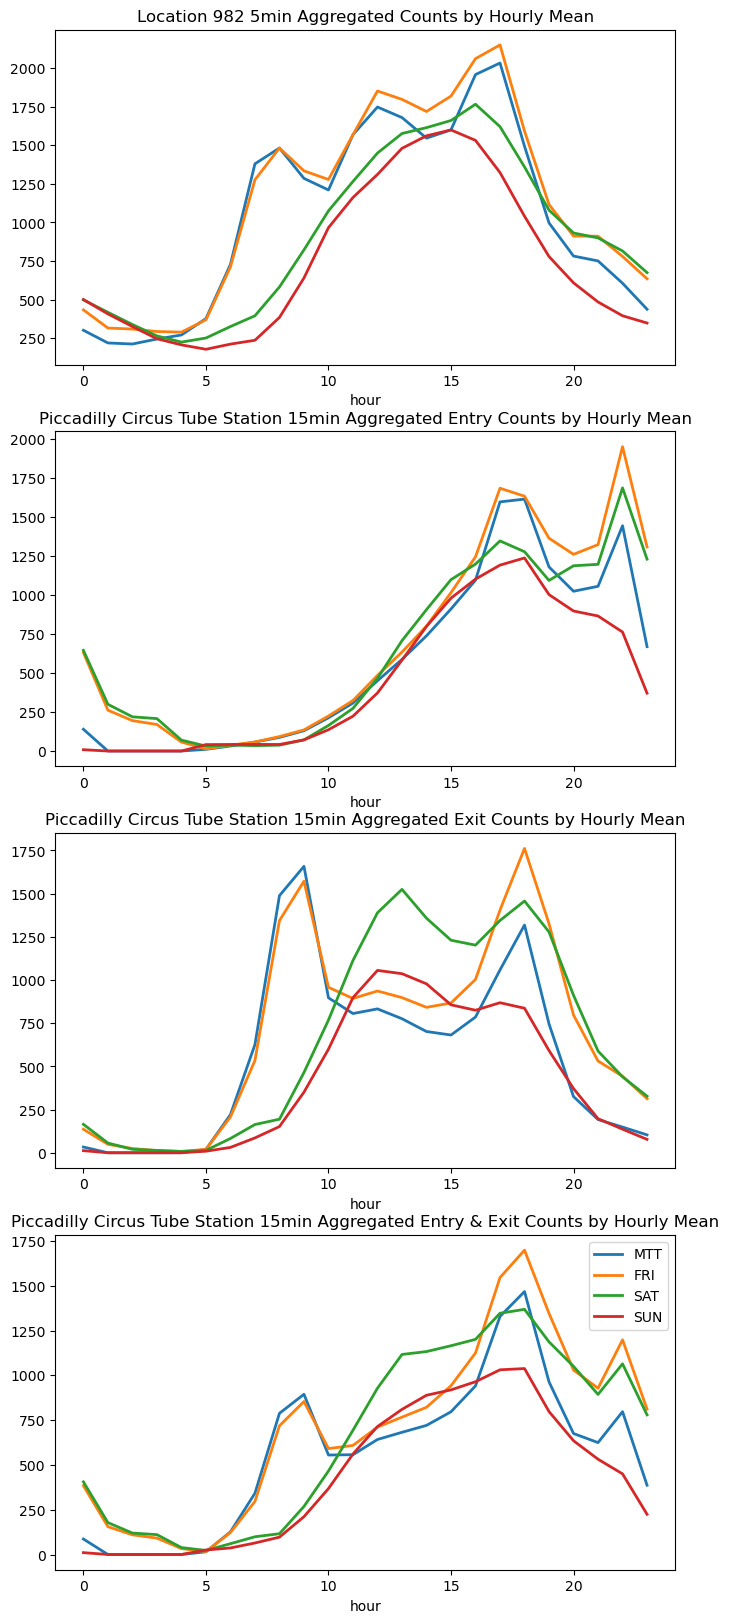

In [99]:
ComparasionPlot(982, 'Piccadilly Circus')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


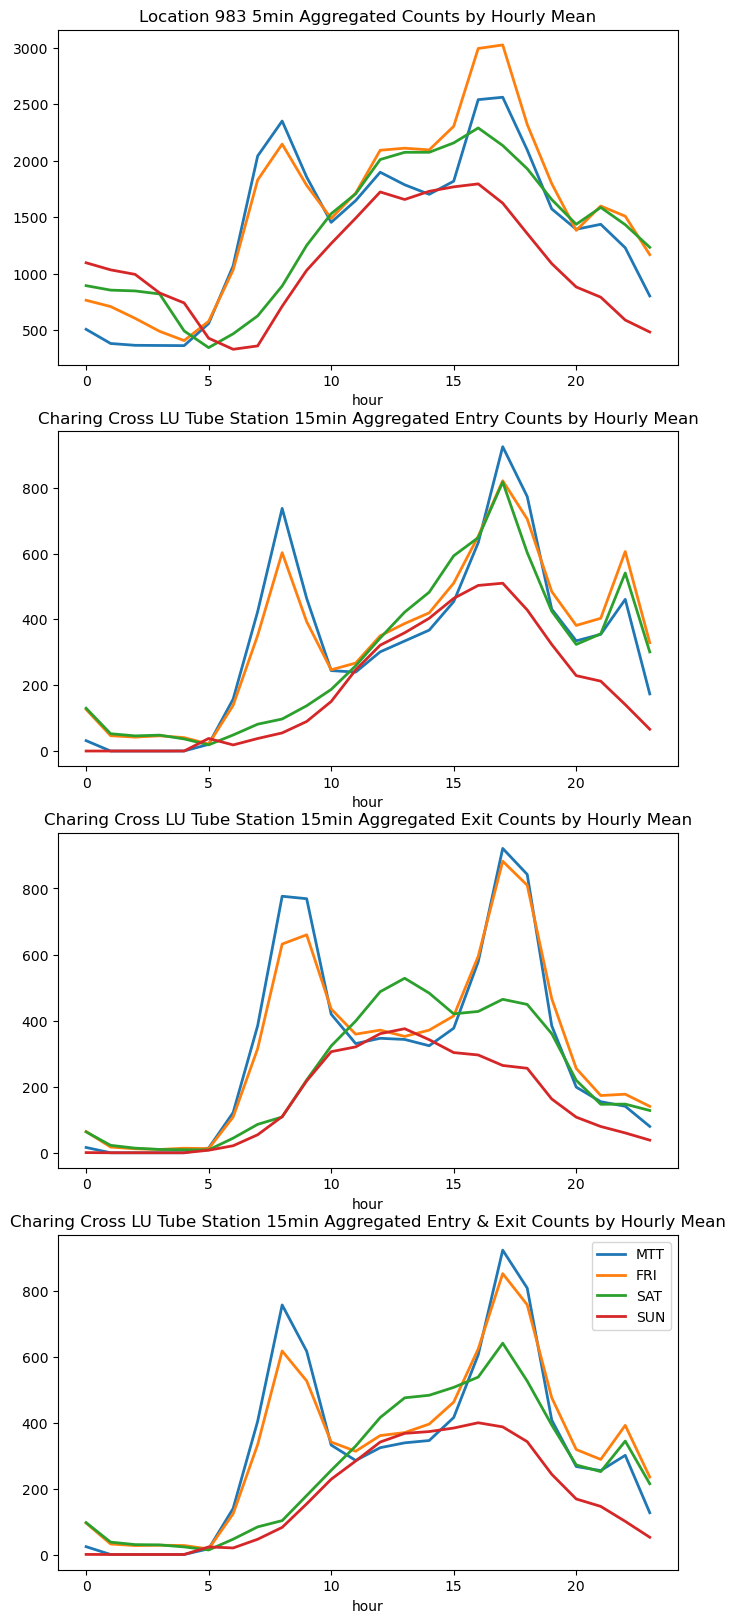

In [100]:
ComparasionPlot(983, 'Charing Cross LU')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


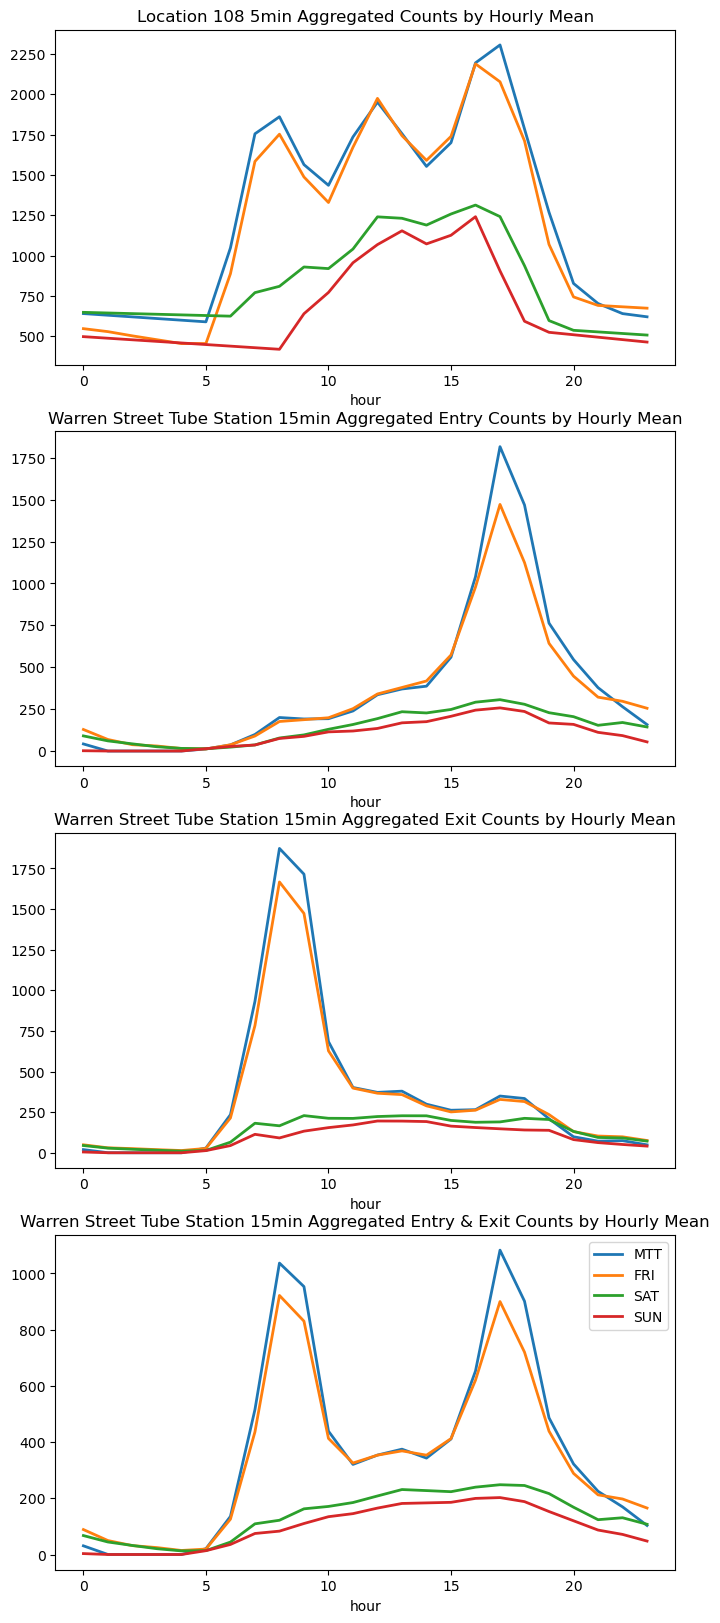

In [101]:
ComparasionPlot(108, 'Warren Street')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


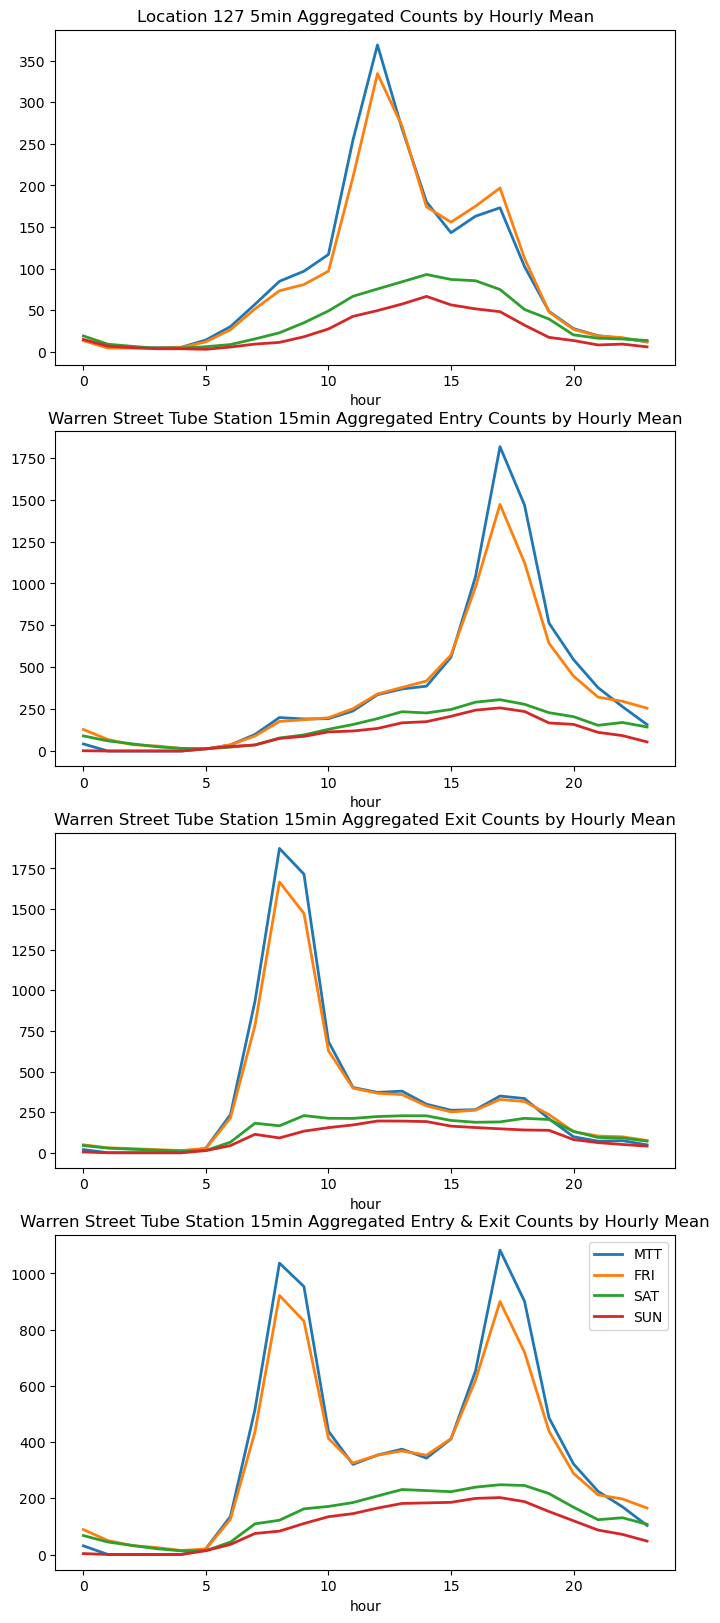

In [102]:
ComparasionPlot(127, 'Warren Street')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


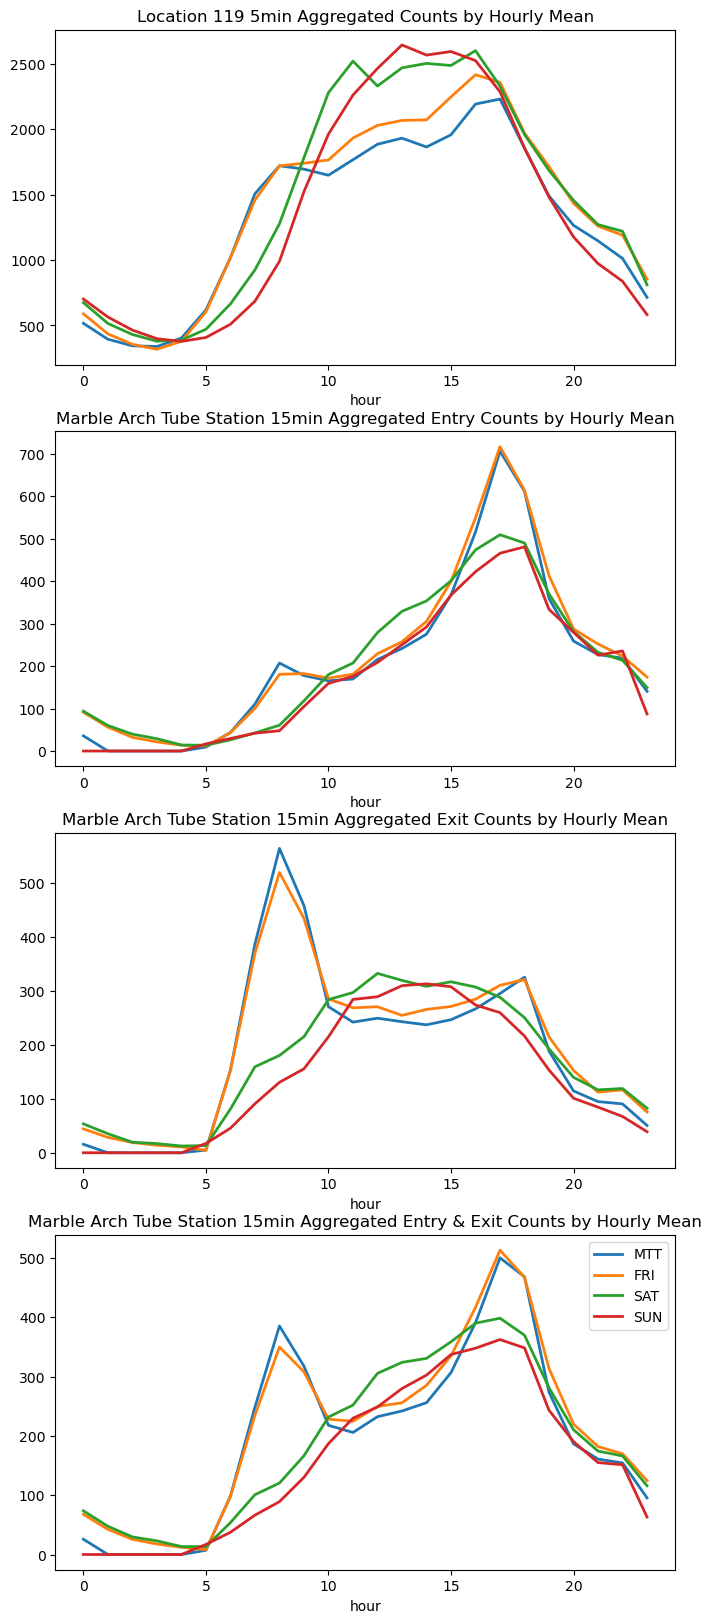

In [103]:
ComparasionPlot(119, 'Marble Arch')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


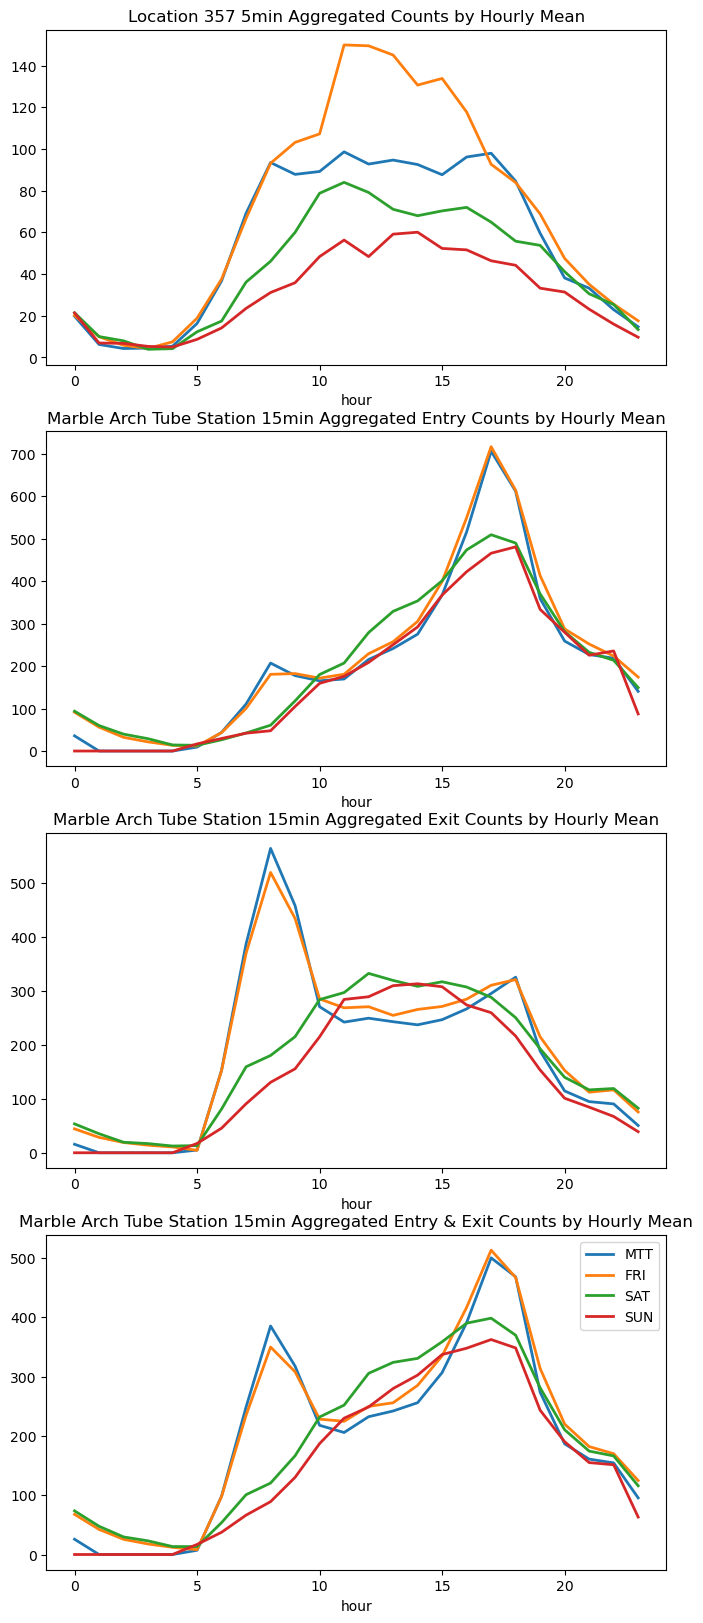

In [104]:
ComparasionPlot(357, 'Marble Arch')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


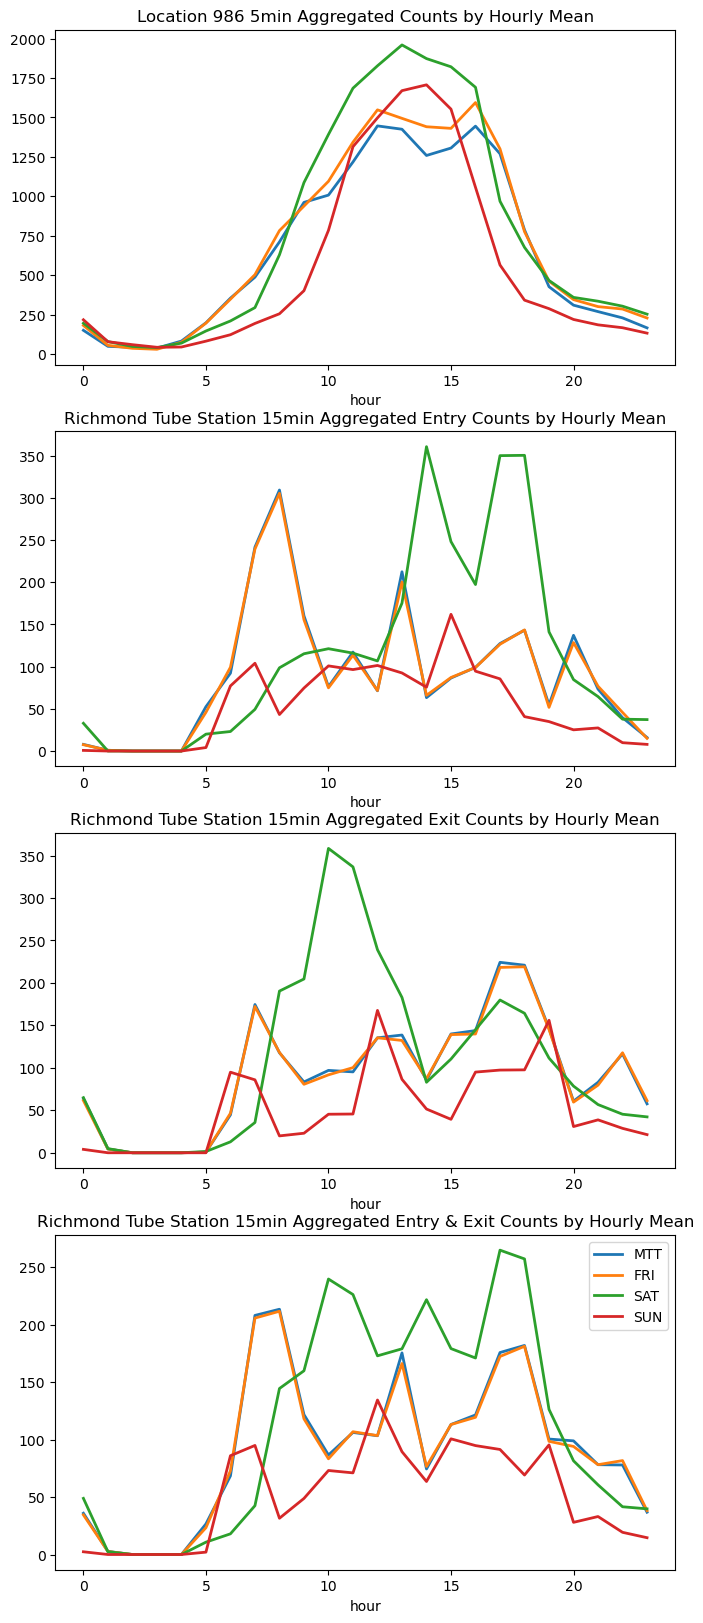

In [105]:
ComparasionPlot(986, 'Richmond')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


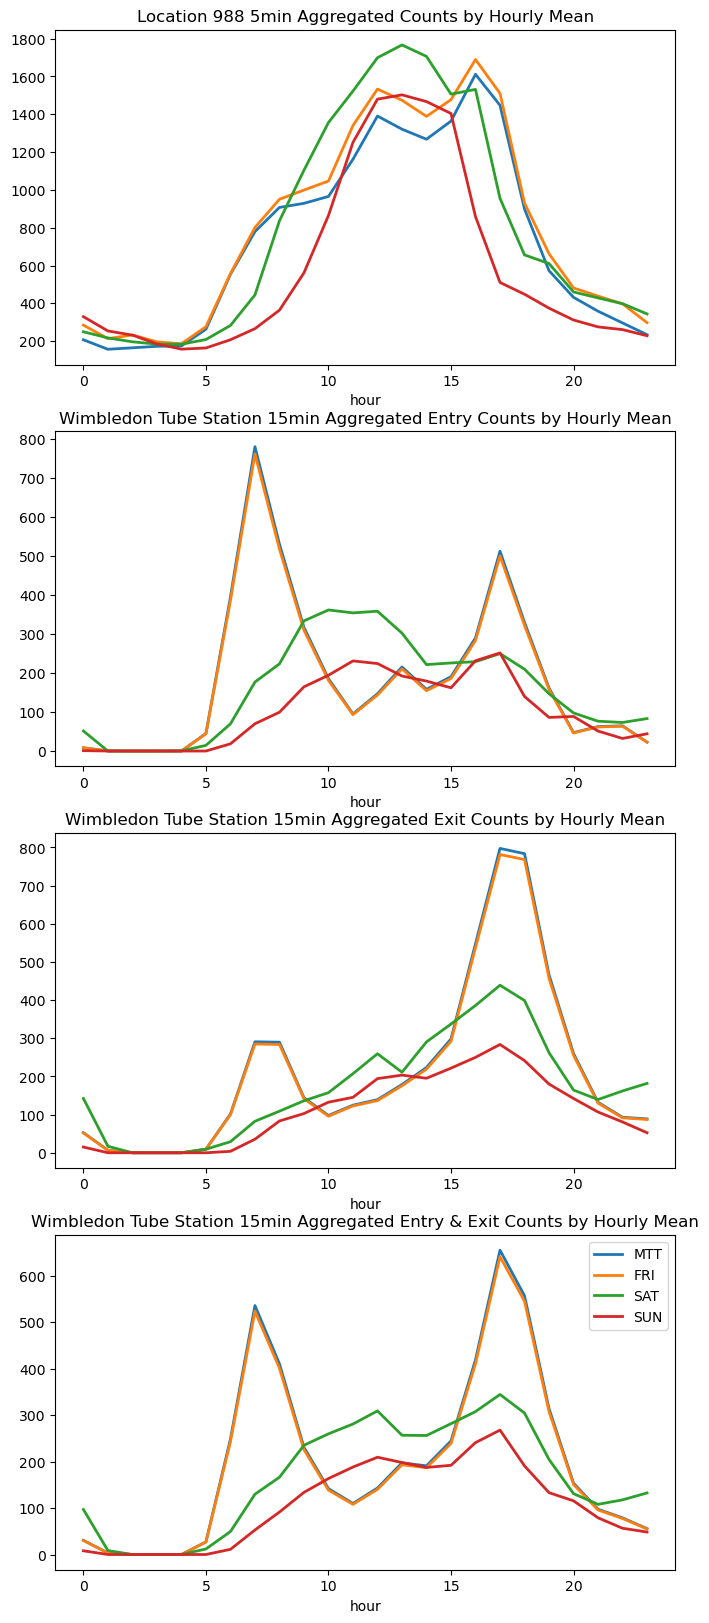

In [106]:
ComparasionPlot(988, 'Wimbledon')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


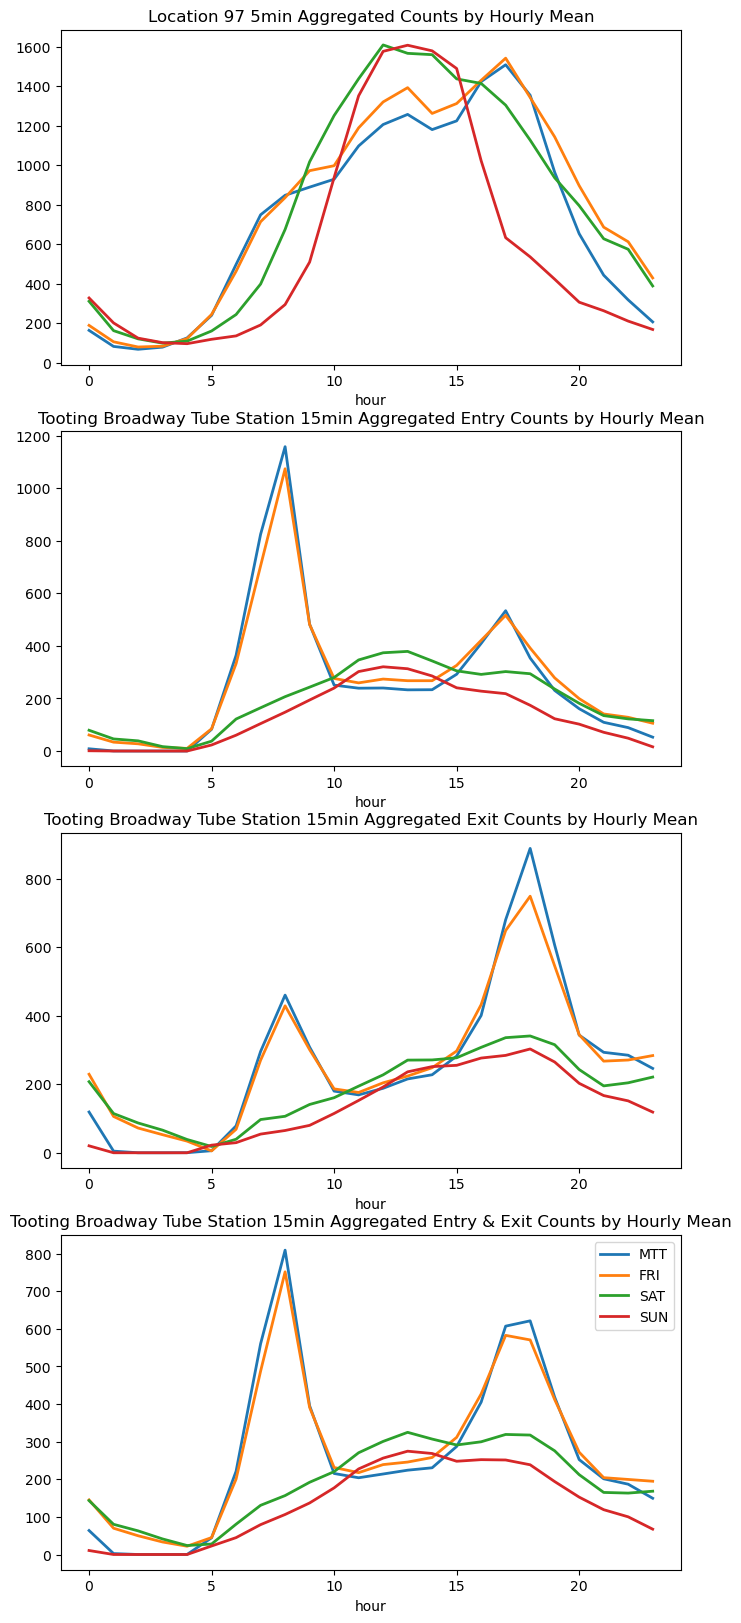

In [107]:
ComparasionPlot(97, 'Tooting Broadway')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


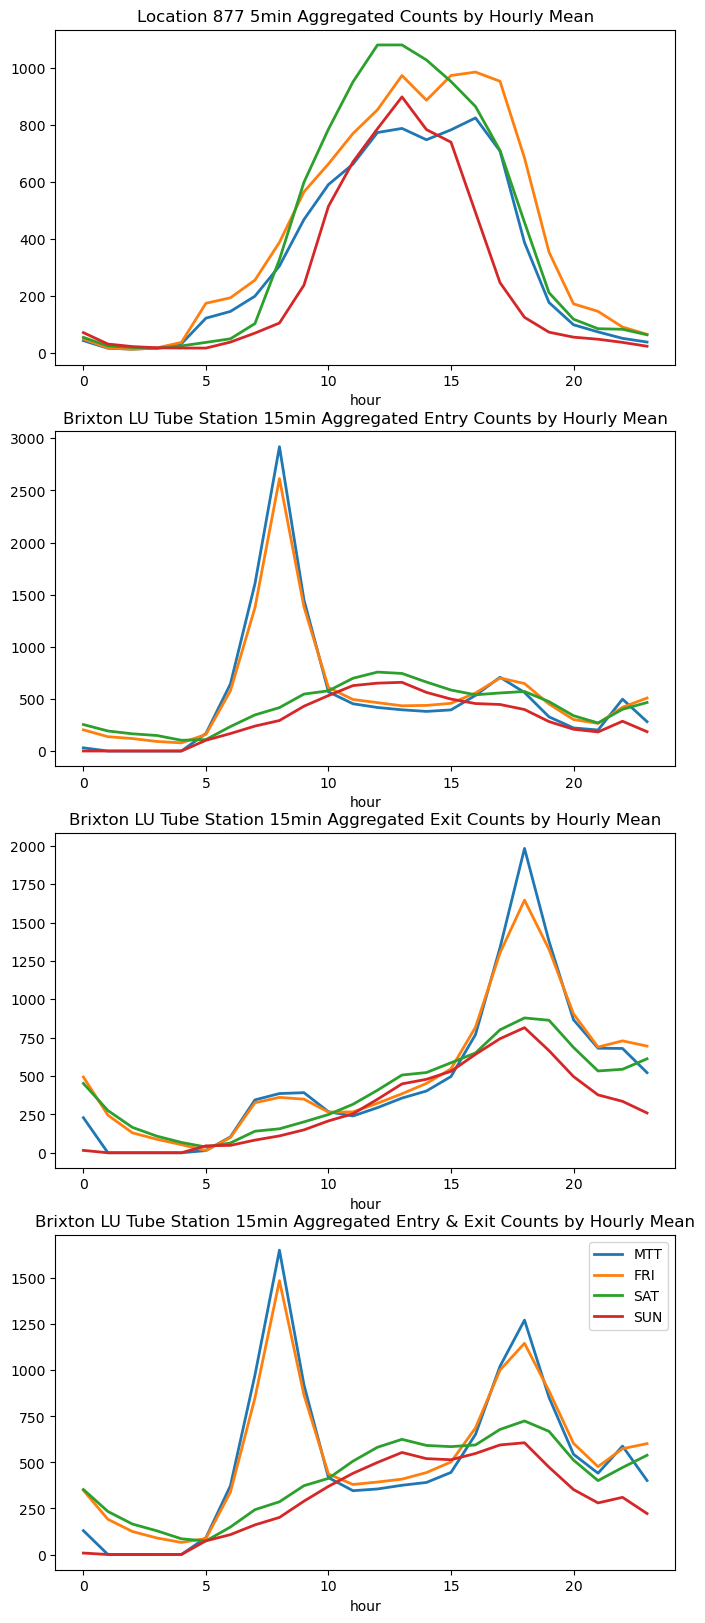

In [108]:
ComparasionPlot(877, 'Brixton LU')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


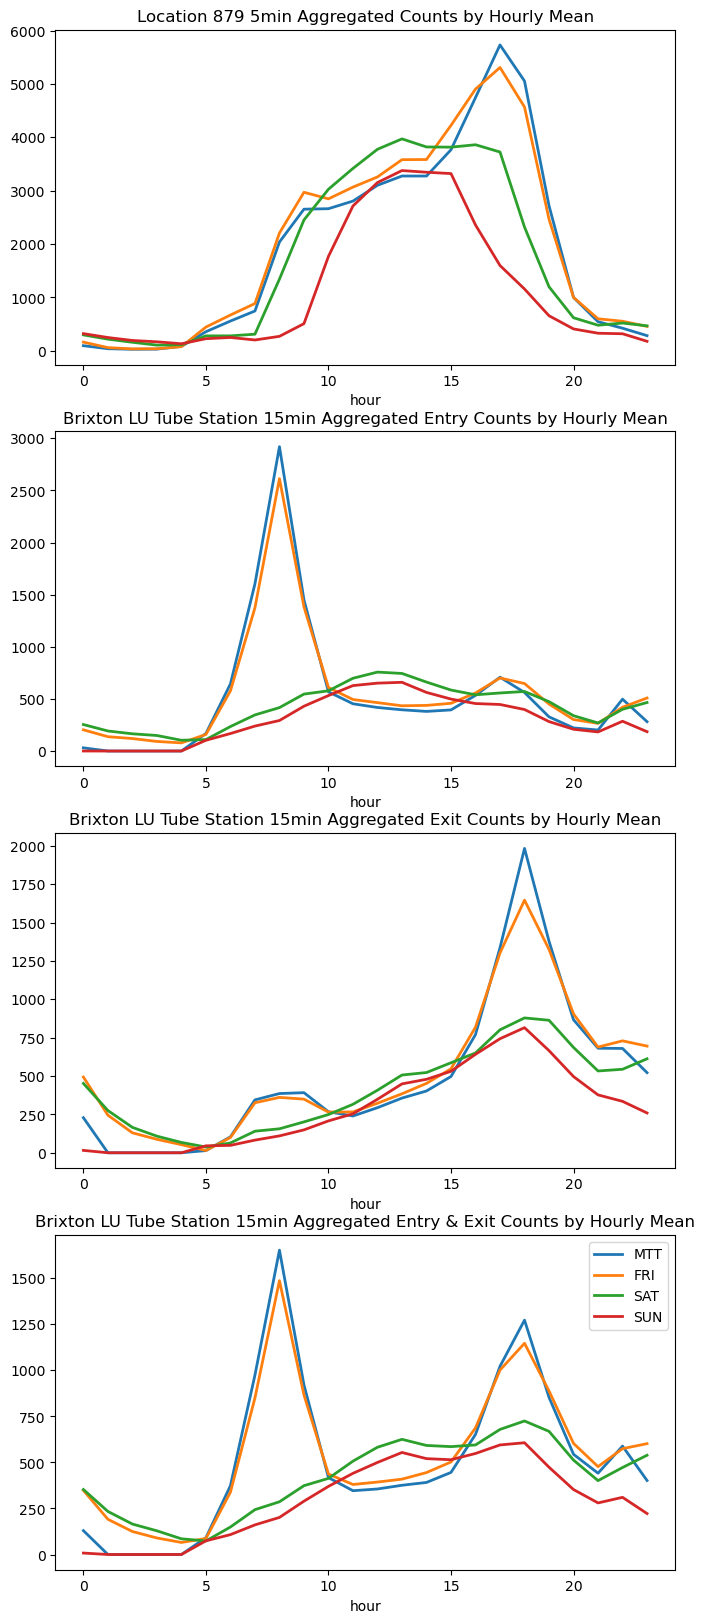

In [109]:
ComparasionPlot(879, 'Brixton LU')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


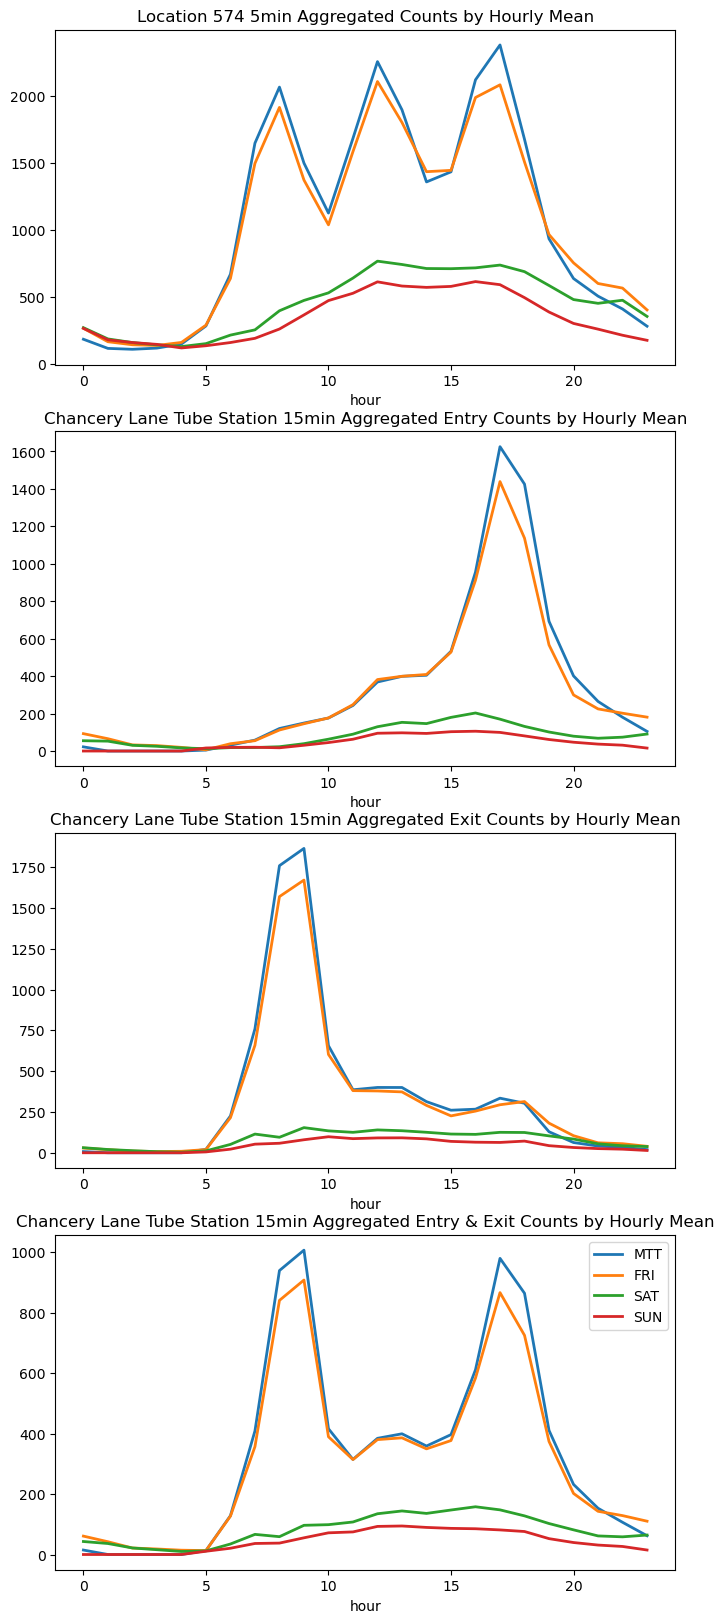

In [110]:
ComparasionPlot(574, 'Chancery Lane')